## A Simple Tutorial on Using Signver Signature Localizer Module 

In [4]:
from signver.localizer import Localizer
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img
from signver.utils.visualization_utils import plot_np_array, draw_rectangle

import numpy as np
import tensorflow as tf

## Instantiate the Module and Load a Model

In [5]:
model_path = "models/localizer/ssd640fpnlite/saved_model"
localizer = Localizer()
localizer.load(model_path)

## Download a Random Image and Invert It

In [6]:
file_url = "https://magazine.art21.org/wp-content/uploads/2009/06/signed-document-by-nam-june-paik-from-the-imas-historical-files.jpg"
file_url_2="https://swimmingfreestyle.net/wp-content/uploads/2019/10/contract-signature-page-example-new-elgin-munity-college-faculty-association-eccfa-of-contract-signature-page-example.png"
file_name = "signdoc.jpg" 
destination_dir = "data/test/localizer"
img_path = data_utils.download_file(file_url_2, file_name,  destination_dir) 

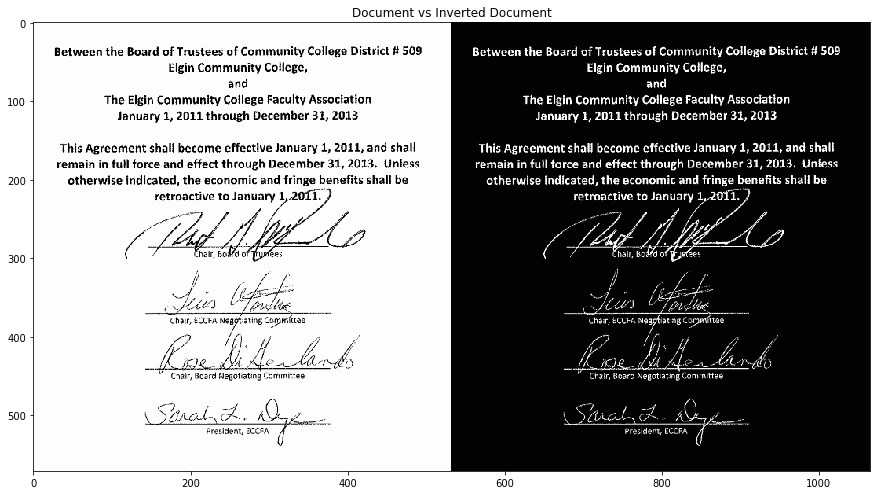

In [7]:
image_np = data_utils.img_to_np_array(img_path)
inverted_image_np = data_utils.invert_img(image_np) 

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]

plot_np_array( np.concatenate((image_np, inverted_image_np ), axis = 1), plot_title="Document vs Inverted Document")

## Get Localization Predictions on Inverted Image

In [8]:
# %timeit
detections = localizer.detect(img_tensor)
num_detections = int(detections["num_detections"])
boxes = tf.reshape(detections["detection_boxes"], [num_detections, 4]).numpy().tolist()
scores = tf.reshape(detections["detection_scores"], [num_detections]).numpy().tolist()
classes = tf.reshape(detections["detection_classes"], [num_detections]).numpy().tolist()

detections.keys()

dict_keys(['detection_anchor_indices', 'raw_detection_boxes', 'detection_multiclass_scores', 'detection_classes', 'detection_boxes', 'detection_scores', 'raw_detection_scores', 'num_detections'])

## Visualize Signature Localization Predictions

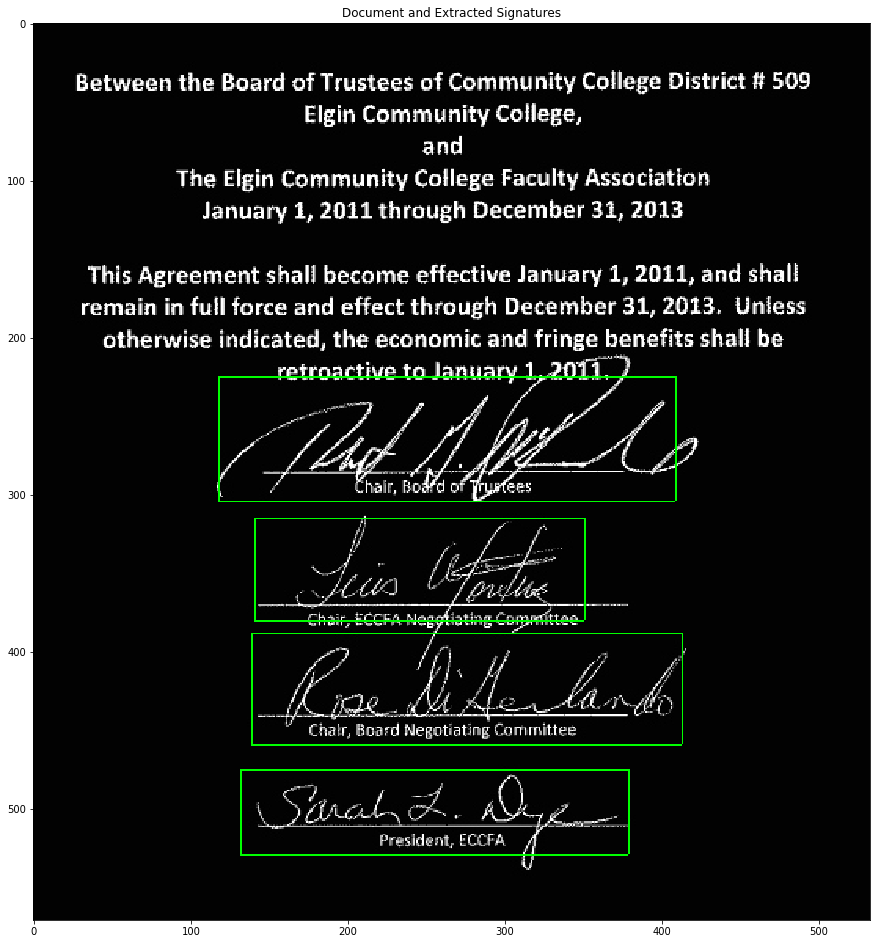

In [13]:
green_color =   np.array([0, 255, 0], dtype=np.uint8)
bboxes = []
for i in range(len(scores)):
    if scores[i] > 0.2:
        height, width, num_channels = inverted_image_np.shape 
        ymin, xmin, ymax, xmax = boxes[i] 
        bbox = (int(xmin*width), int(ymin*height), int((xmax-xmin)* width), int((ymax-ymin)*height) )
        bboxes.append(bbox)

bounded = draw_rectangle(inverted_image_np, green_color, bboxes)
plot_np_array(bounded, plot_title="Document and Extracted Signatures")         